In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn import metrics
#from sklearn import externals
#from io import StringIO
import seaborn as sns 
#from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#import matplotlib.image as mpimg
#import matplotlib.pyplot as plt
#from sklearn.tree import export_graphviz
from imblearn.over_sampling import RandomOverSampler
import plotly.graph_objs as go

# 1 - Business Problem

___Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"___

# 2 - Data collection and description

In [2]:
fraud=pd.read_csv("C:\\Users\\Hp\\Downloads\\Fraud_check.csv")

In [3]:
fraud

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [4]:
fraud.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [5]:
fraud.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [6]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

# check outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

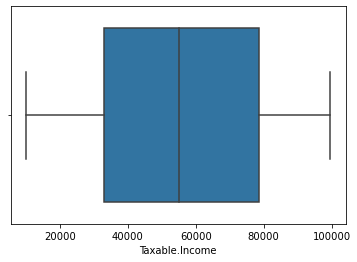

In [8]:
sns.boxplot(fraud['Taxable.Income'])

There are no outliers in the data

In [9]:
plt.rcParams['figure.figsize']=9,5

skew:0.030014788906377175
kurtosis:-1.1997824607083138


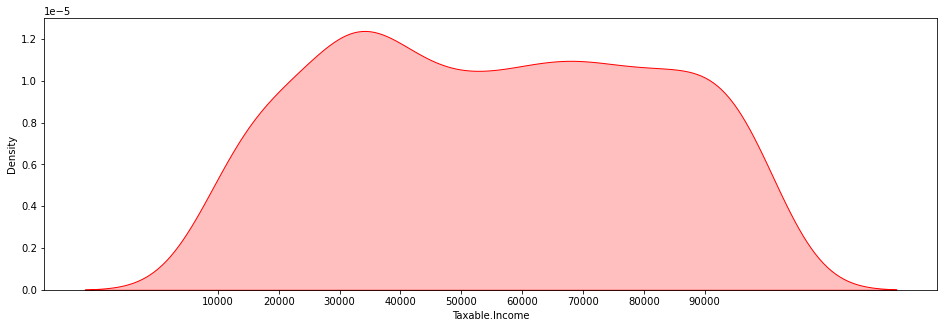

In [10]:
plt.figure(figsize=(16,5))
print('skew:{}'.format(fraud['Taxable.Income'].skew()))
print('kurtosis:{}'.format(fraud['Taxable.Income'].kurtosis()))
sns.kdeplot(fraud['Taxable.Income'],shade=True,color='r')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

The data is skwed on the right

The data has negative Kurtosis

In [11]:
df1 = pd.get_dummies(fraud, columns = ['Undergrad','Marital.Status','Urban'])

In [12]:
corr=df1.corr()

<AxesSubplot:>

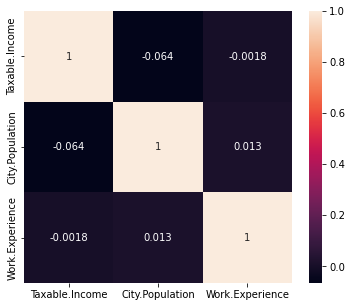

In [13]:
plt.figure(figsize=(6,5))
sns.heatmap(fraud.corr(),annot=True)

<AxesSubplot:>

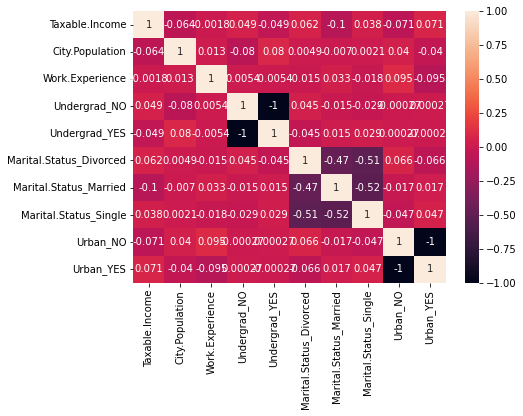

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True)

In [15]:
fraud.sort_values(by='Taxable.Income')

Undergrad Marital.Status  Taxable.Income  City.Population  \
233        NO        Married           10003            63701   
68         NO         Single           10150           139642   
36        YES        Married           10163           193995   
79         NO       Divorced           10329           140885   
94         NO         Single           10348           122705   
..        ...            ...             ...              ...   
516       YES         Single           99239            76337   
209       YES         Single           99307           186239   
422        NO       Divorced           99311           191983   
91        YES        Married           99325            73733   
69        YES         Single           99619            86896   

     Work.Experience Urban  
233               19   YES  
68                 5    NO  
36                 5   YES  
79                 7   YES  
94                 6   YES  
..               ...   ...  
516               18   YES  
209               25   YES  
422               14   YES  
91                10   YES  
69                29    NO  

[600 rows x 6 columns]

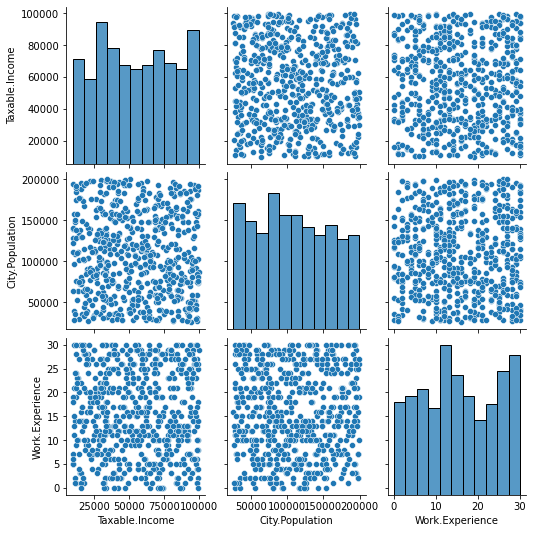

In [16]:
sns.pairplot(fraud)

# 3 - Decision Tree

Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"


In [17]:
#fraud['Taxable.Income']= np.where( fraud['Taxable.Income']<= 30000,0,1)
#fraud

In [18]:
fraud['Taxable.Income_c']=pd.cut(fraud['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [19]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [20]:
fraud['Taxable.Income_c'].value_counts()

good     476
risky    124
Name: Taxable.Income_c, dtype: int64

In [21]:
list(fraud.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Taxable.Income_c']

# Encoding the independent variables

In [22]:
data_fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'])
data_fraud

Taxable.Income  City.Population  Work.Experience Taxable.Income_c  \
0             68833            50047               10             good   
1             33700           134075               18             good   
2             36925           160205               30             good   
3             50190           193264               15             good   
4             81002            27533               28             good   
..              ...              ...              ...              ...   
595           76340            39492                7             good   
596           69967            55369                2             good   
597           47334           154058                0             good   
598           98592           180083               17             good   
599           96519           158137               16             good   

     Undergrad_NO  Undergrad_YES  Marital.Status_Divorced  \
0               1              0                        0   
1               0              1                        1   
2               1              0                        0   
3               0              1                        0   
4               1              0                        0   
..            ...            ...                      ...   
595             0              1                        1   
596             0              1                        1   
597             1              0                        1   
598             0              1                        0   
599             1              0                        1   

     Marital.Status_Married  Marital.Status_Single  Urban_NO  Urban_YES  
0                         0                      1         0          1  
1                         0                      0         0          1  
2                         1                      0         0          1  
3                         0                      1         0          1  
4                         1                      0         1          0  
..                      ...                    ...       ...        ...  
595                       0                      0         0          1  
596                       0                      0         0          1  
597                       0                      0         0          1  
598                       1                      0         1          0  
599                       0                      0         1          0  

[600 rows x 11 columns]

In [23]:
data_fraud['Taxable.Income_c'] = data_fraud['Taxable.Income_c'].map({'good':1,'risky':0})

# Scaling the data

In [24]:
scaler = MinMaxScaler()
scaled_data1=pd.DataFrame(scaler.fit_transform(data_fraud),columns=data_fraud.columns, index=data_fraud.index)
scaled_data1

Taxable.Income  City.Population  Work.Experience  Taxable.Income_c  \
0          0.656468         0.139472         0.333333               1.0   
1          0.264428         0.622394         0.600000               1.0   
2          0.300415         0.772568         1.000000               1.0   
3          0.448436         0.962563         0.500000               1.0   
4          0.792258         0.010081         0.933333               1.0   
..              ...              ...              ...               ...   
595        0.740236         0.078811         0.233333               1.0   
596        0.669122         0.170058         0.066667               1.0   
597        0.416566         0.737240         0.000000               1.0   
598        0.988540         0.886810         0.566667               1.0   
599        0.965408         0.760683         0.533333               1.0   

     Undergrad_NO  Undergrad_YES  Marital.Status_Divorced  \
0             1.0            0.0                      0.0   
1             0.0            1.0                      1.0   
2             1.0            0.0                      0.0   
3             0.0            1.0                      0.0   
4             1.0            0.0                      0.0   
..            ...            ...                      ...   
595           0.0            1.0                      1.0   
596           0.0            1.0                      1.0   
597           1.0            0.0                      1.0   
598           0.0            1.0                      0.0   
599           1.0            0.0                      1.0   

     Marital.Status_Married  Marital.Status_Single  Urban_NO  Urban_YES  
0                       0.0                    1.0       0.0        1.0  
1                       0.0                    0.0       0.0        1.0  
2                       1.0                    0.0       0.0        1.0  
3                       0.0                    1.0       0.0        1.0  
4                       1.0                    0.0       1.0        0.0  
..                      ...                    ...       ...        ...  
595                     0.0                    0.0       0.0        1.0  
596                     0.0                    0.0       0.0        1.0  
597                     0.0                    0.0       0.0        1.0  
598                     1.0                    0.0       1.0        0.0  
599                     0.0                    0.0       1.0        0.0  

[600 rows x 11 columns]

In [25]:
x=scaled_data1.drop(['Taxable.Income','Taxable.Income_c'],axis=1)
y=scaled_data1['Taxable.Income_c']

In [26]:
columns=x.columns

In [27]:
y.value_counts()

1.0    476
0.0    124
Name: Taxable.Income_c, dtype: int64

# Resampling the data

In [28]:
ros=RandomOverSampler(random_state=42)

In [29]:
x_resample,y_resample=ros.fit_resample(x,y)
y_resample.value_counts()

1.0    476
0.0    476
Name: Taxable.Income_c, dtype: int64

# Splitting the data using train test split.

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

x_train

City.Population  Work.Experience  Undergrad_NO  Undergrad_YES  \
108         0.546641         0.333333           0.0            1.0   
272         0.578791         0.033333           1.0            0.0   
599         0.760683         0.533333           1.0            0.0   
479         0.248369         0.700000           0.0            1.0   
436         0.760223         0.133333           1.0            0.0   
..               ...              ...           ...            ...   
71          0.459204         0.733333           1.0            0.0   
106         0.188254         0.666667           0.0            1.0   
270         0.602883         0.166667           1.0            0.0   
435         0.494227         0.133333           1.0            0.0   
102         0.377640         0.766667           0.0            1.0   

     Marital.Status_Divorced  Marital.Status_Married  Marital.Status_Single  \
108                      0.0                     1.0                    0.0   
272                      0.0                     0.0                    1.0   
599                      1.0                     0.0                    0.0   
479                      0.0                     1.0                    0.0   
436                      1.0                     0.0                    0.0   
..                       ...                     ...                    ...   
71                       0.0                     0.0                    1.0   
106                      0.0                     0.0                    1.0   
270                      0.0                     1.0                    0.0   
435                      1.0                     0.0                    0.0   
102                      1.0                     0.0                    0.0   

     Urban_NO  Urban_YES  
108       0.0        1.0  
272       0.0        1.0  
599       1.0        0.0  
479       1.0        0.0  
436       0.0        1.0  
..        ...        ...  
71        1.0        0.0  
106       0.0        1.0  
270       1.0        0.0  
435       0.0        1.0  
102       1.0        0.0  

[420 rows x 9 columns]

In [31]:
y_train

108    1.0
272    1.0
599    1.0
479    1.0
436    1.0
      ... 
71     1.0
106    0.0
270    1.0
435    1.0
102    1.0
Name: Taxable.Income_c, Length: 420, dtype: float64

In [32]:
criteria=["gini","entropy"]
for x in criteria:
    acc = []
    for i in range(2,20,1):
        model = DecisionTreeClassifier(criterion = x,max_depth=i,random_state=42)
        model.fit(x_train, y_train)
        train=model.score(x_train, y_train)
        test=model.score(x_test, y_test)
        acc.append([train, test])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=np.arange(2,20,1), y=[i[0] for i in acc],
                    mode='lines+markers',
                    name='Training'))
    fig.add_trace(go.Scatter(x=np.arange(2,20,1), y=[i[1] for i in acc],
                    mode='lines+markers',
                    name='Testing'))
    fig.update_layout(title=x,
                   xaxis_title='Max-depth',
                   yaxis_title='Accuracy')
    fig.show()

# Building Decision Tree Classifier Using Entropy Criteria

In [33]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [34]:
df1.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

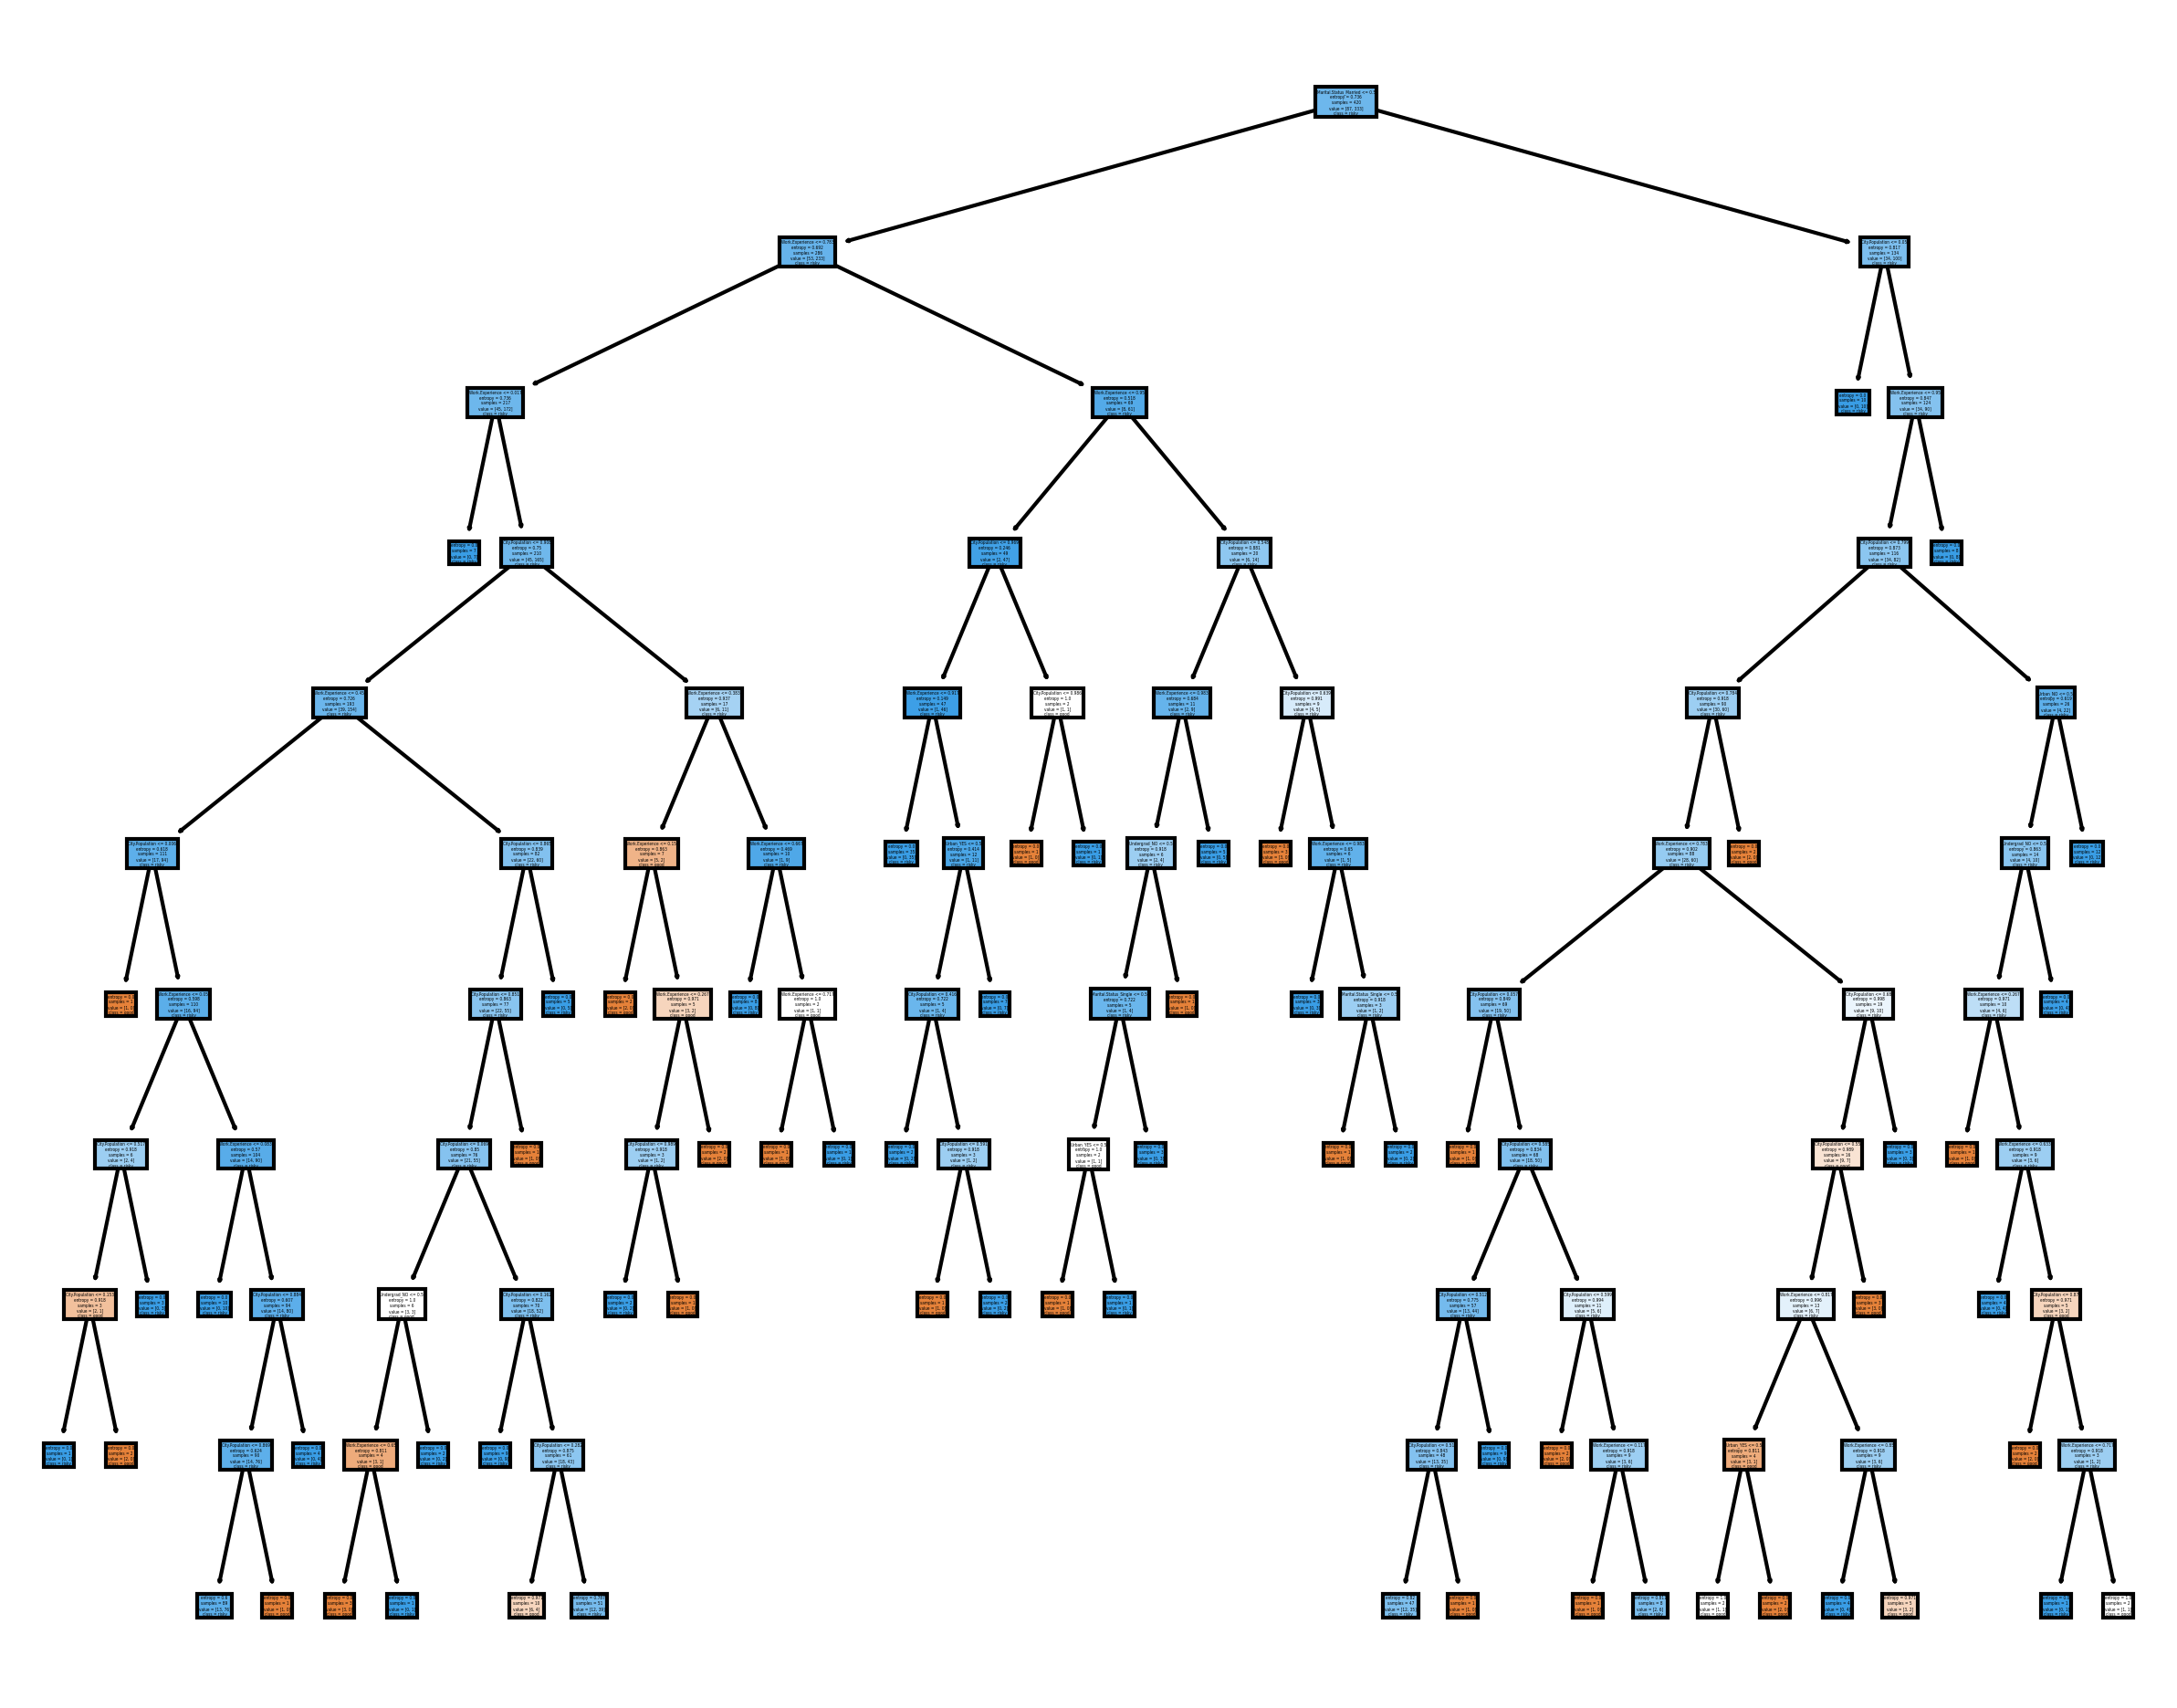

In [35]:
fn=['City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES']
cn=['good','risky'] # class names
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,8),dpi=300)
plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True)
plt.show()

In [36]:
# predicting on test data

preds=model.predict(x_test)
pd.Series(preds).value_counts

<bound method IndexOpsMixin.value_counts of 0      1.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
175    1.0
176    1.0
177    0.0
178    0.0
179    1.0
Length: 180, dtype: float64>

In [37]:
y_test

110    0.0
419    1.0
565    1.0
77     1.0
181    0.0
      ... 
54     1.0
493    0.0
46     1.0
93     0.0
264    1.0
Name: Taxable.Income_c, Length: 180, dtype: float64

In [38]:
preds

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1.])

In [39]:
pd.crosstab(y_test,preds)

col_0             0.0  1.0
Taxable.Income_c          
0.0                 5   32
1.0                22  121

# Confusion Matrix for the model accuracy

In [40]:
# confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,preds)
print(confusion_matrix)

[[  5  32]
 [ 22 121]]


<AxesSubplot:>

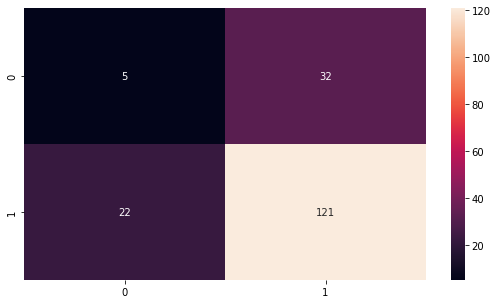

In [41]:
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True,fmt='.0f',xticklabels=True,yticklabels=True)

In [42]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.19      0.14      0.16        37
         1.0       0.79      0.85      0.82       143

    accuracy                           0.70       180
   macro avg       0.49      0.49      0.49       180
weighted avg       0.67      0.70      0.68       180



# ROC Cruve



 ROC AUC score:0.4906444906444906




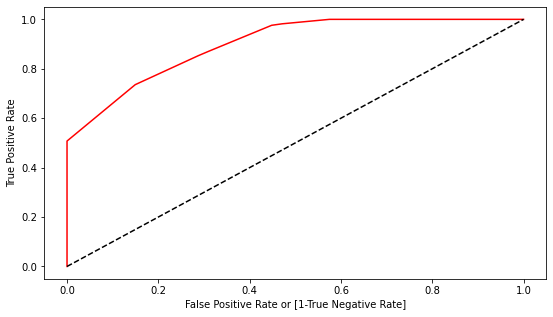

In [43]:
# AUC and ROC

fpr,tpr,thresholds=roc_curve(y_train,model.predict_proba(x_train)[:,1])

auc=roc_auc_score(y_test,preds)

plt.plot(fpr,tpr,color='red',label='logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
print(f'\n\n ROC AUC score:{auc}\n\n')
plt.ylabel('True Positive Rate')
plt.show()